In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers and Skewness(0 > log transform; 0.5 > square root transform)
from scipy.stats import zscore, boxcox

# Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Regluar Expressions
import re

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df_train = pd.read_excel('doctor_consultation_fees_train.xlsx')
df_test = pd.read_excel('doctor_consultation_fees_test.xlsx')

In [3]:
print('Shape of Training Set ::',df_train.shape,'\nShape of Testing Set ::', df_test.shape)

Shape of Training Set :: (5961, 7) 
Shape of Testing Set :: (1987, 6)


In [4]:
df_train.to_csv('doctor_consultation_fees_train.csv')
df_test.to_csv('doctor_consultation_fees_test.csv')

In [5]:
df=df_train.append(df_test, ignore_index=True)
df

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...
7943,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
7944,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
7945,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
7946,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


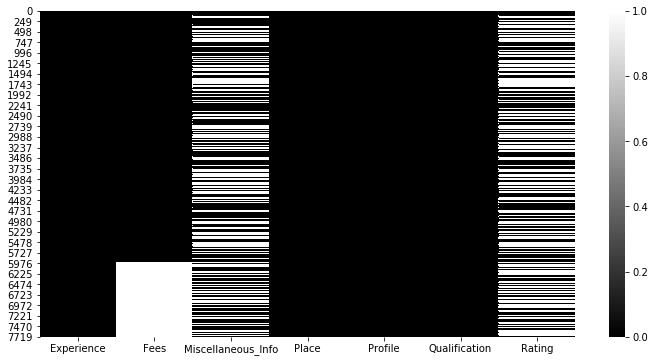

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cmap='gray')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948 entries, 0 to 7947
Data columns (total 7 columns):
Experience            7948 non-null object
Fees                  5961 non-null float64
Miscellaneous_Info    4494 non-null object
Place                 7917 non-null object
Profile               7948 non-null object
Qualification         7948 non-null object
Rating                3556 non-null object
dtypes: float64(1), object(6)
memory usage: 434.8+ KB


We have a dataset with strings and loads of null values. Let's start cooking the dataset to see what we can eat.

In [8]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [9]:
df.columns

Index(['Experience', 'Fees', 'Miscellaneous_Info', 'Place', 'Profile',
       'Qualification', 'Rating'],
      dtype='object')

In [10]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print(df[i].describe())
    else:
        print(df[i].unique())

####### Experience #######
count                   7948
unique                    64
top       9 years experience
freq                     419
Name: Experience, dtype: object
####### Fees #######
count    5961.000000
mean      307.944640
std       190.920373
min         5.000000
25%       150.000000
50%       300.000000
75%       500.000000
max       950.000000
Name: Fees, dtype: float64
####### Miscellaneous_Info #######
count                                                  4494
unique                                                 3980
top       Acrylic Partial Denture Crowns and Bridges Fix...
freq                                                     50
Name: Miscellaneous_Info, dtype: object
####### Place #######
count                      7917
unique                      948
top       HSR Layout, Bangalore
freq                         97
Name: Place, dtype: object
####### Profile #######
['Homeopath' 'Ayurveda' 'ENT Specialist' 'Dentist' 'General Medicine'
 'Dermatologists']
####

In [11]:
df['Experience'].value_counts()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
60 years experience      1
61 years experience      1
66 years experience      1
64 years experience      1
58 years experience      1
Name: Experience, Length: 64, dtype: int64

In [12]:
df['Experience'] = df['Experience'].str.split(' ').str[0].astype(int)
df['Experience'].unique()

array([24, 12,  9, 20,  8, 42, 10, 14, 23,  5,  7, 21, 19, 41, 31, 25, 16,
       15, 11, 22, 38,  6, 36, 13, 18, 46, 40, 49, 33,  0, 27, 30, 52, 60,
       26, 35, 34, 39, 32, 17, 28, 58,  4, 45, 44,  3, 37, 50, 29, 43, 54,
       66,  2, 51, 47, 48, 53, 56, 61, 59, 57, 55, 65, 64], dtype=int64)

In [13]:
data = df['Qualification'].str.split(',', expand=True)

In [14]:
# data.isnull().sum()
data.fillna('0', inplace=True)

In [15]:
for i in data:
    data[i]=data[i].str.strip()
    print('----',i,'>>>', data[i].nunique())
    print(data[i].unique(), '\n')

---- 0 >>> 180
['BHMS' 'BAMS' 'MBBS' 'BSc - Zoology' 'BDS' 'BSc' 'MDS'
 'Diploma in Dermatology' 'DM - Neurology' 'MD - Homeopathy'
 'MDS - Prosthodontist And Crown Bridge'
 'MDS - Oral & Maxillofacial Surgery'
 'MDS - Periodontology and Oral Implantology' 'MD - Dermatology'
 'MDS-Oral Pathology and Oral Microbiology'
 'Get inspired by remarkable stories of people like you'
 'PhD - Orthodontics & Dentofacial Orthopaedics' 'MRCPS'
 'MDS - Conservative Dentistry & Endodontics' 'MD - Ayurveda Medicine'
 'MS - General Surgery' 'DDVL' 'MD - General Medicine'
 'DHMS (Diploma in Homeopathic Medicine and Surgery)' 'MS - ENT'
 'MD - Internal Medicine' 'GCEH' 'MS - Otorhinolaryngology'
 'Post Graduate Diploma in Healthcare Management(PGDHM)'
 'DNB - Paediatrics' 'Certification in Aesthetic Dentistry'
 'Fellowship In Laryngology Bronchoesophagology' 'FAGE'
 'Fellowship in Aesthetic Medicine'
 'MS - Ayurvedic Gynecology & Obstetrics' 'BSAM' 'MD - Skin & VD'
 'MDS - Periodontics' 'Diploma in Family

In [16]:
# For detailed analysis and due to limited viewing space in Jupyter, we can export the data to excel.
data.to_excel('doctor_consultation_fees_qualification.xlsx')

In [17]:
data.sort_values(by=0, ascending=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
753,39 years experience,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1136,Advanced Certificate Course in Aesthetic Denti...,BDS,Professional Implantology Training Course (PITC),FAGE- FELLOW,Comprehensive Course in Modern Endodontics,0,0,0,0,0,0,0,0,0,0,0,0
3632,Ayurvedic panchkarma,BAMS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2735,B.Ac,BEMS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7427,B.Sc,BAMS,MD - Yoga and Rehab,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6050,Post Graduate Diploma in Diabetology (PGDD)(Ma...,MBBS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236,Post Graduate Diploma in Healthcare Management...,MBBS,MD - Internal Medicine,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2420,Post Graduate Diploma in Periodontics and Impl...,Fellowship Program in Forensic Odontology,BDS,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2505,Post MD SR AIIMS,MD - Dermatology,MBBS,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Data was displaying experience, so we need to confirm if this is captured correctly by df['Experience']

In [18]:
print(df['Qualification'][753])
print(df['Experience'][753])

39 years experience
39


In [19]:
data[data.index==753]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
753,39 years experience,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Another observation is that there was no data for qualification for index 753

In [20]:
df.drop(index=753, axis=0, inplace=True)
data.drop(index=753, axis=0, inplace=True)

We will start with identifying the list of occupations.

In [21]:
lst = []
for i in data:
    lst = lst + data[i].unique().tolist()
lst = sorted(set(filter(None, lst)))
len(lst)

899

Unfortunately, having 898 columns isn't the most efficient way to clean a data. Let's group occupations and replace respective values.

In [22]:
# data.isna().sum()
data.fillna('0', inplace=True)

In [23]:
ind = data[(data[0].str.startswith('Get inspired'))].index
df.drop(index=ind, axis=0, inplace=True)
data.drop(index=ind, axis=0, inplace=True)

In [24]:
def classify(col, num, value):
    for i in num:
        data[col][i] = value

In [25]:
def cls(col):
    ind = data[(data[col].str.contains('Post Graduate')) | (data[col].str.contains('Post-Graduate')) | (data[col].str.contains('POST')) | (data[col].str.contains('PGD')) | (data[col].str.startswith('MRC')) | (data[col].str.contains('Member'))].index
    classify(col, ind, 'Post_Graduate_Diploma')
    ind = data[(data[col].str.contains('Diploma')) & (data[col].str.contains('Post_Graduate_Diploma')==False) | (data[col].str.contains('DHMS'))].index
    classify(col, ind, 'Diploma')
    ind = data[(data[col].str.startswith('B'))].index
    classify(col, ind, 'Graduate')
    ind = data[(data[col].str.contains('Doctor')) | (data[col].str.contains('DM'))].index
    classify(col, ind, 'Doctorate')
    ind = data[(data[col].str.contains('Fellowship')) | (data[col].str.startswith('F'))].index
    classify(col, ind, 'Fellowship')
    ind = data[(data[col].str.contains('DNB'))].index
    classify(col, ind, 'Diplomate_of_National_Board')
    ind = data[(data[col].str.startswith('M.S')) | (data[col].str.contains('MS'))].index
    classify(col, ind, 'MS')
    ind = data[(data[col].str.contains('PhD'))].index
    classify(col, ind, 'PhD')
    ind = data[(data[col].str.startswith('MDS'))].index
    classify(col, ind, 'Masters_of_Dental_Science')
    ind = data[(data[col].str.contains('MD')) | (data[col].str.contains('M.D')) | (data[col].str.contains('M. D'))].index
    classify(col, ind, 'Doctor_of_Medicine')
    searchfor = ['MS','MBBS','Doctor_of_Medicine','PhD','Post_Graduate_Diploma','Diploma','Diplomate_of_National_Board','Fellowship','Doctorate','Graduate','0']
    ind = data[(~data[col].str.contains('|'.join(searchfor)))].index
    classify(col, ind, 'Others')

In [26]:
for i in data:
    cls(i)

In [27]:
data[data[9]=='Fellowship']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2035,Fellowship,Others,Others,Others,Others,Others,Others,Fellowship,Others,Fellowship,0,0,0,0,0,0,0


In [28]:
data1 = data[~data.isna()]

In [29]:
data1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Graduate,Doctor_of_Medicine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Graduate,Doctor_of_Medicine,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,MBBS,MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Graduate,Graduate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Graduate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,Graduate,Doctorate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7944,Doctor_of_Medicine,Others,MBBS,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7945,MBBS,MS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7946,Graduate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
lst1 = ['MS','MBBS','Doctor_of_Medicine','PhD','Post_Graduate_Diploma','Diploma','Diplomate_of_National_Board','Fellowship','Doctorate','Graduate','0']
data1 = data.apply(pd.Series.value_counts, axis=1)[lst1].fillna(0)

In [31]:
mbbs2 = df[data1['MBBS']==2].index
for i in mbbs2:
    data1['MBBS'][i]=1

In [32]:
data1.drop(columns=['0'], axis=1, inplace=True)

In [33]:
df['Qual_Count'] = df['Qualification'].str.count(',') + 1

In [34]:
df=pd.concat([df, data1], axis=1)
df.head(5)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Qual_Count,MS,MBBS,Doctor_of_Medicine,PhD,Post_Graduate_Diploma,Diploma,Diplomate_of_National_Board,Fellowship,Doctorate,Graduate
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,9,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
df['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       'General Dentistry Dental Fillings RCT - Single Sitting',
       '98% 240 Feedback Velachery, Chennai',
       'RCT - Root Canal Treatment Root Canal Treatment - Rotary Pyorrhoea Treatment'],
      dtype=object)

In [36]:
df['Miscellaneous']=df['Miscellaneous_Info'].str.split('%', 1).str[1].str.strip()
df['Miscellaneous'].unique()

array(['16 Feedback Kakkanad, Ernakulam',
       '76 Feedback Whitefield, Bangalore', nan, ...,
       '36 Feedback Moti Nagar, Hyderabad',
       '20 Feedback Miyapur, Hyderabad',
       '240 Feedback Velachery, Chennai'], dtype=object)

In [37]:
df['Feedback'] = df['Miscellaneous'].str.extract('(\d+)')
df['Feedback'].unique()

array(['16', '76', nan, '4', '14', '8', '7', '46', '6', '60', '18', '2',
       '3', '21', '42', '65', '54', '43', '24', '44', '9', '47', '33',
       '51', '23', '30', '13', '84', '15', '55', '112', '20', '1', '5',
       '17', '67', '48', '11', '12', '40', '39', '57', '68', '175', '28',
       '34', '29', '19', '10', '506', '62', '38', '116', '53', '99',
       '566', '31', '72', '49', '50', '126', '22', '92', '59', '78',
       '493', '147', '101', '444', '1061', '282', '213', '82', '181',
       '187', '36', '71', '131', '159', '32', '141', '91', '153', '150',
       '88', '83', '26', '80', '27', '45', '35', '560', '188', '94', '64',
       '41', '37', '246', '109', '135', '52', '08', '118', '547', '203',
       '372', '435', '108', '56', '66', '102', '63', '210', '180', '61',
       '120', '128', '98', '854', '105', '96', '89', '25', '86', '74',
       '130', '148', '332', '97', '185', '154', '343', '192', '152', '87',
       '178', '309', '103', '243', '155', '238', '79', '388', 

In [38]:
# Since Feedback and Rating is missng values, we can assume that their corresonding Feedback and Rating is 0.
for i in df[(df['Feedback'].isna()) & (df['Rating'].isna())].index:
    df['Feedback'][i], df['Rating'][i] = 0, 0

In [39]:
df['Rating'].unique()

array(['100%', '98%', 0, '99%', '79%', '95%', '97%', '94%', '88%', '90%',
       '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%', '74%',
       '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%', '60%',
       '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%', '84%',
       '45%', '63%', '72%', '81%', '62%', '57%', nan, '7%', '48%', '40%',
       '70%', '64%', '65%', '47%', '58%', '53%', '52%'], dtype=object)

In [40]:
df['Rating'] = df['Rating'].str.split('%').str[0].astype(float)
df['Rating'].mean()

94.59251968503936

There are lots of missing values and we cannot delete them. We will replace it with mean values.

In [41]:
a = int(df['Rating'].mean())
df['Rating'].fillna(a, inplace=True)
df['Rating'] = df['Rating'].astype(int)

In [42]:
a = df['Feedback'].astype(float).mean()
df['Feedback'].fillna(a, inplace=True)
df['Feedback'] = df['Feedback'].astype(int)

In [43]:
df['Place'].value_counts()

HSR Layout, Bangalore              97
Andheri West, Mumbai               97
Dwarka, Delhi                      93
Banjara Hills, Hyderabad           85
Mulund West, Mumbai                81
                                   ..
Karukappilli, Ernakulam             1
Paravur, Ernakulam                  1
Hyder Nagar, Hyderabad              1
Model Town 3, Delhi                 1
SG Palya (Kormangla), Bangalore     1
Name: Place, Length: 948, dtype: int64

In [44]:
df['Town'] = df['Place'].str.split(', ').str[0].str.strip()
df['City'] = df['Place'].str.split(', ').str[1].str.strip()

In [45]:
df['City'].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1600
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Sector 5                 1
Name: City, dtype: int64

In [46]:
df[df['City']=='Sector 5'].index

Int64Index([2169], dtype='int64')

In [47]:
df['City'][2169]='Delhi'
df['City'].value_counts()

Bangalore             1678
Mumbai                1608
Delhi                 1601
Hyderabad             1284
Chennai               1142
Coimbatore             298
Ernakulam              201
Thiruvananthapuram     103
Name: City, dtype: int64

In [48]:
df['Town'].nunique()

937

In [49]:
df.head(5)

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Qual_Count,MS,MBBS,...,Post_Graduate_Diploma,Diploma,Diplomate_of_National_Board,Fellowship,Doctorate,Graduate,Miscellaneous,Feedback,Town,City
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,"16 Feedback Kakkanad, Ernakulam",16,Kakkanad,Ernakulam
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,"76 Feedback Whitefield, Bangalore",76,Whitefield,Bangalore
2,9,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",94,2,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,Mathikere - BEL,Bangalore
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",94,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,NaN,0,Bannerghatta Road,Bangalore
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,"4 Feedback Keelkattalai, Chennai",4,Keelkattalai,Chennai


In [50]:
df['Profile'].value_counts()

Dentist             1838
General Medicine    1616
Dermatologists      1343
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64

In [51]:
df.drop(columns=['Miscellaneous_Info', 'Place', 'Qualification', 'Miscellaneous'], axis=1, inplace=True)
df.shape

(7917, 18)

In [52]:
df

,Experience,Fees,Profile,Rating,Qual_Count,MS,MBBS,Doctor_of_Medicine,PhD,Post_Graduate_Diploma,Diploma,Diplomate_of_National_Board,Fellowship,Doctorate,Graduate,Feedback,Town,City
0,24,100.0,Homeopath,100,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16,Kakkanad,Ernakulam
1,12,350.0,Ayurveda,98,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,Whitefield,Bangalore
2,9,300.0,ENT Specialist,94,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Mathikere - BEL,Bangalore
3,12,250.0,Ayurveda,94,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,Bannerghatta Road,Bangalore
4,20,250.0,Ayurveda,100,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,10,NaN,Ayurveda,94,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,Basavanagudi,Bangalore
7944,4,NaN,Dermatologists,94,3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Choolai,Chennai
7945,9,NaN,General Medicine,94,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Porur,Chennai
7946,12,NaN,Dentist,98,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13,Arekere,Bangalore


In [53]:
df.drop(index=(df[df['Town'].isna()].index), axis=0, inplace=True)

In [54]:
df.head(3)

,Experience,Fees,Profile,Rating,Qual_Count,MS,MBBS,Doctor_of_Medicine,PhD,Post_Graduate_Diploma,Diploma,Diplomate_of_National_Board,Fellowship,Doctorate,Graduate,Feedback,Town,City
0,24,100.0,Homeopath,100,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16,Kakkanad,Ernakulam
1,12,350.0,Ayurveda,98,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76,Whitefield,Bangalore
2,9,300.0,ENT Specialist,94,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Mathikere - BEL,Bangalore


## Data Visualization

In [55]:
cat_df, num_df = [], []
for i in df:
    if df[i].dtype=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 18
>>> Number of Categorical Features :: 3
>>> Number of Numerical Features :: 15


Skewness of Experience = 0.99
Skewness of Fees = 0.75
Skewness of Rating = -4.43
Skewness of Qual_Count = 1.77
Skewness of MS = 2.60
Skewness of MBBS = 0.09
Skewness of Doctor_of_Medicine = 1.16
Skewness of PhD = 10.42
Skewness of Post_Graduate_Diploma = 5.62
Skewness of Diploma = 3.71
Skewness of Diplomate_of_National_Board = 3.46
Skewness of Fellowship = 4.87
Skewness of Doctorate = 10.77
Skewness of Graduate = 0.15
Skewness of Feedback = 17.10


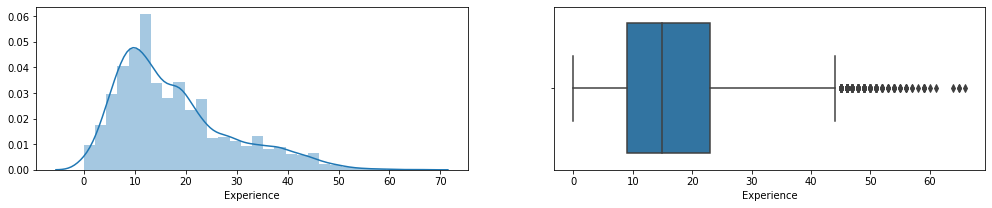

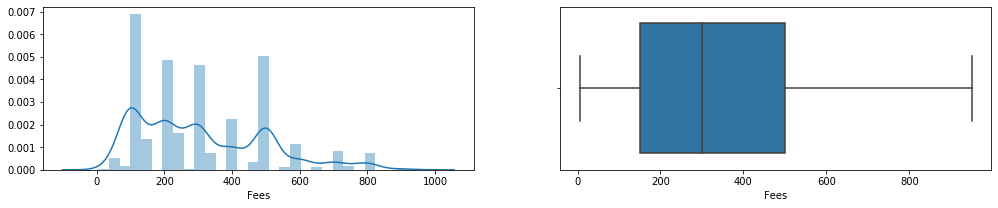

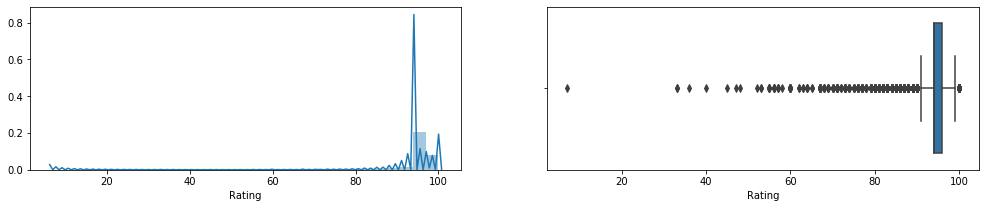

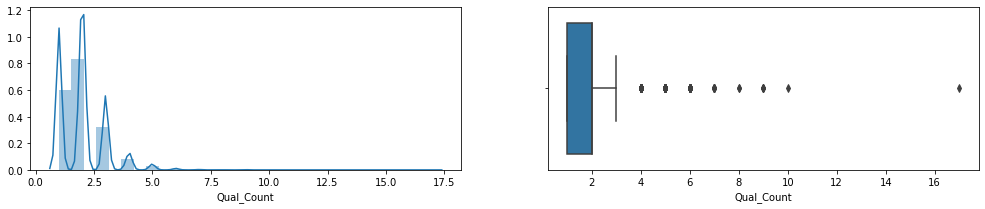

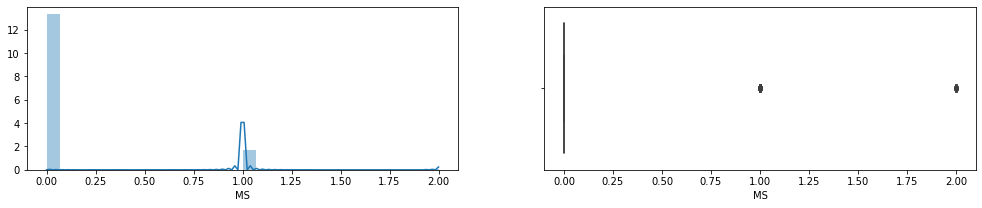

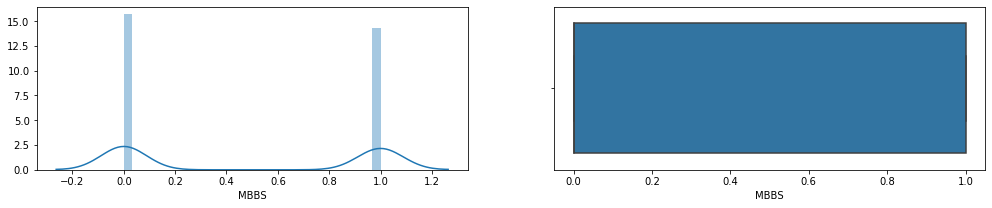

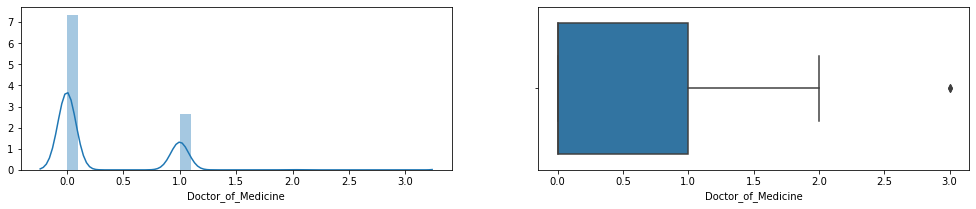

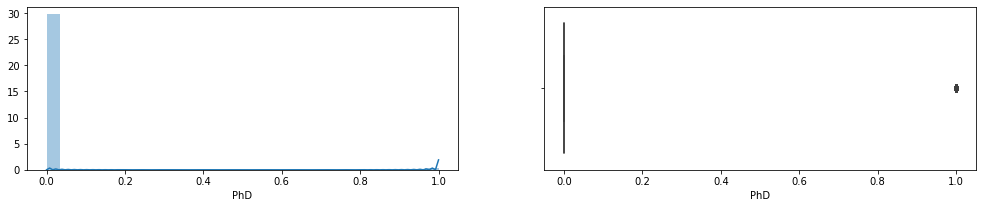

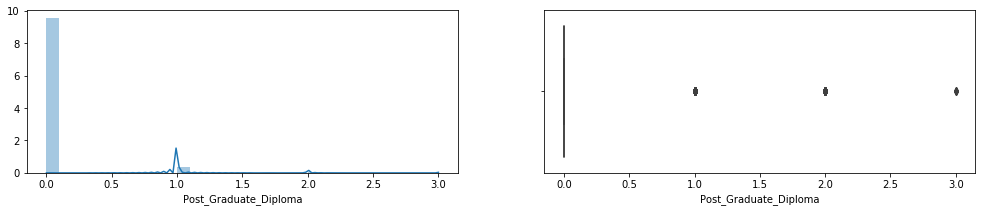

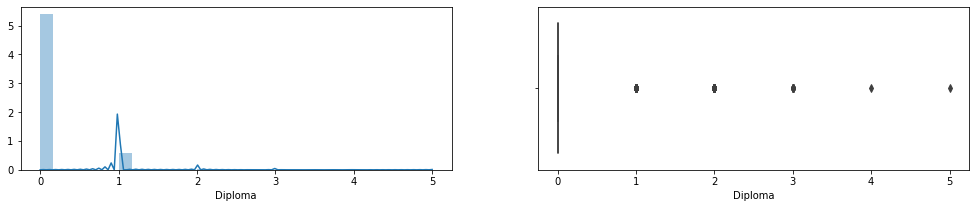

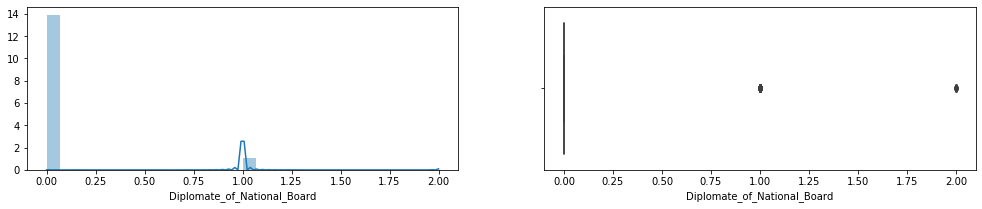

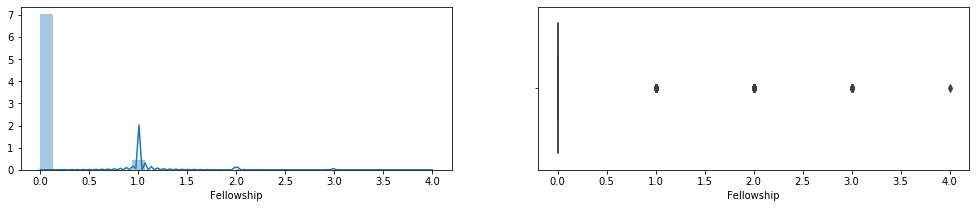

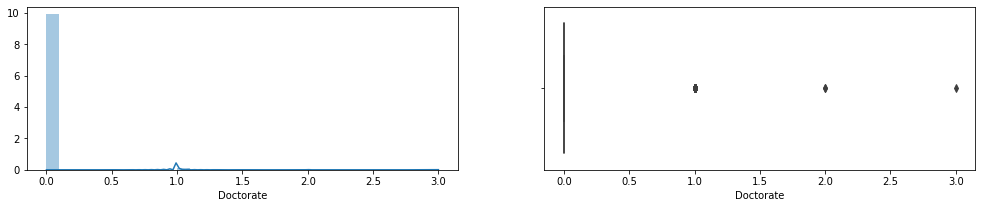

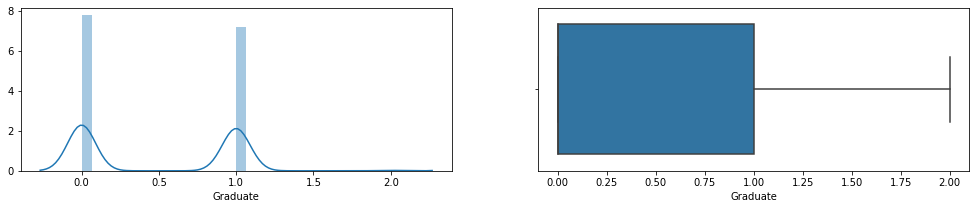

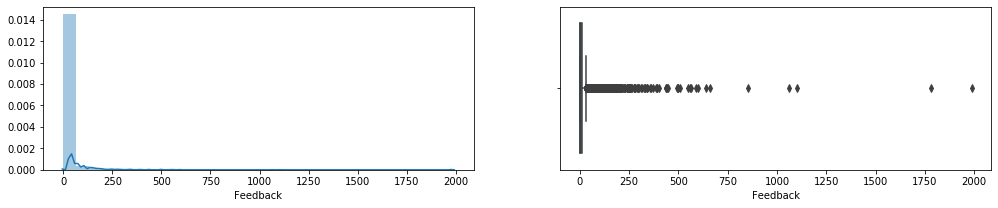

In [56]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

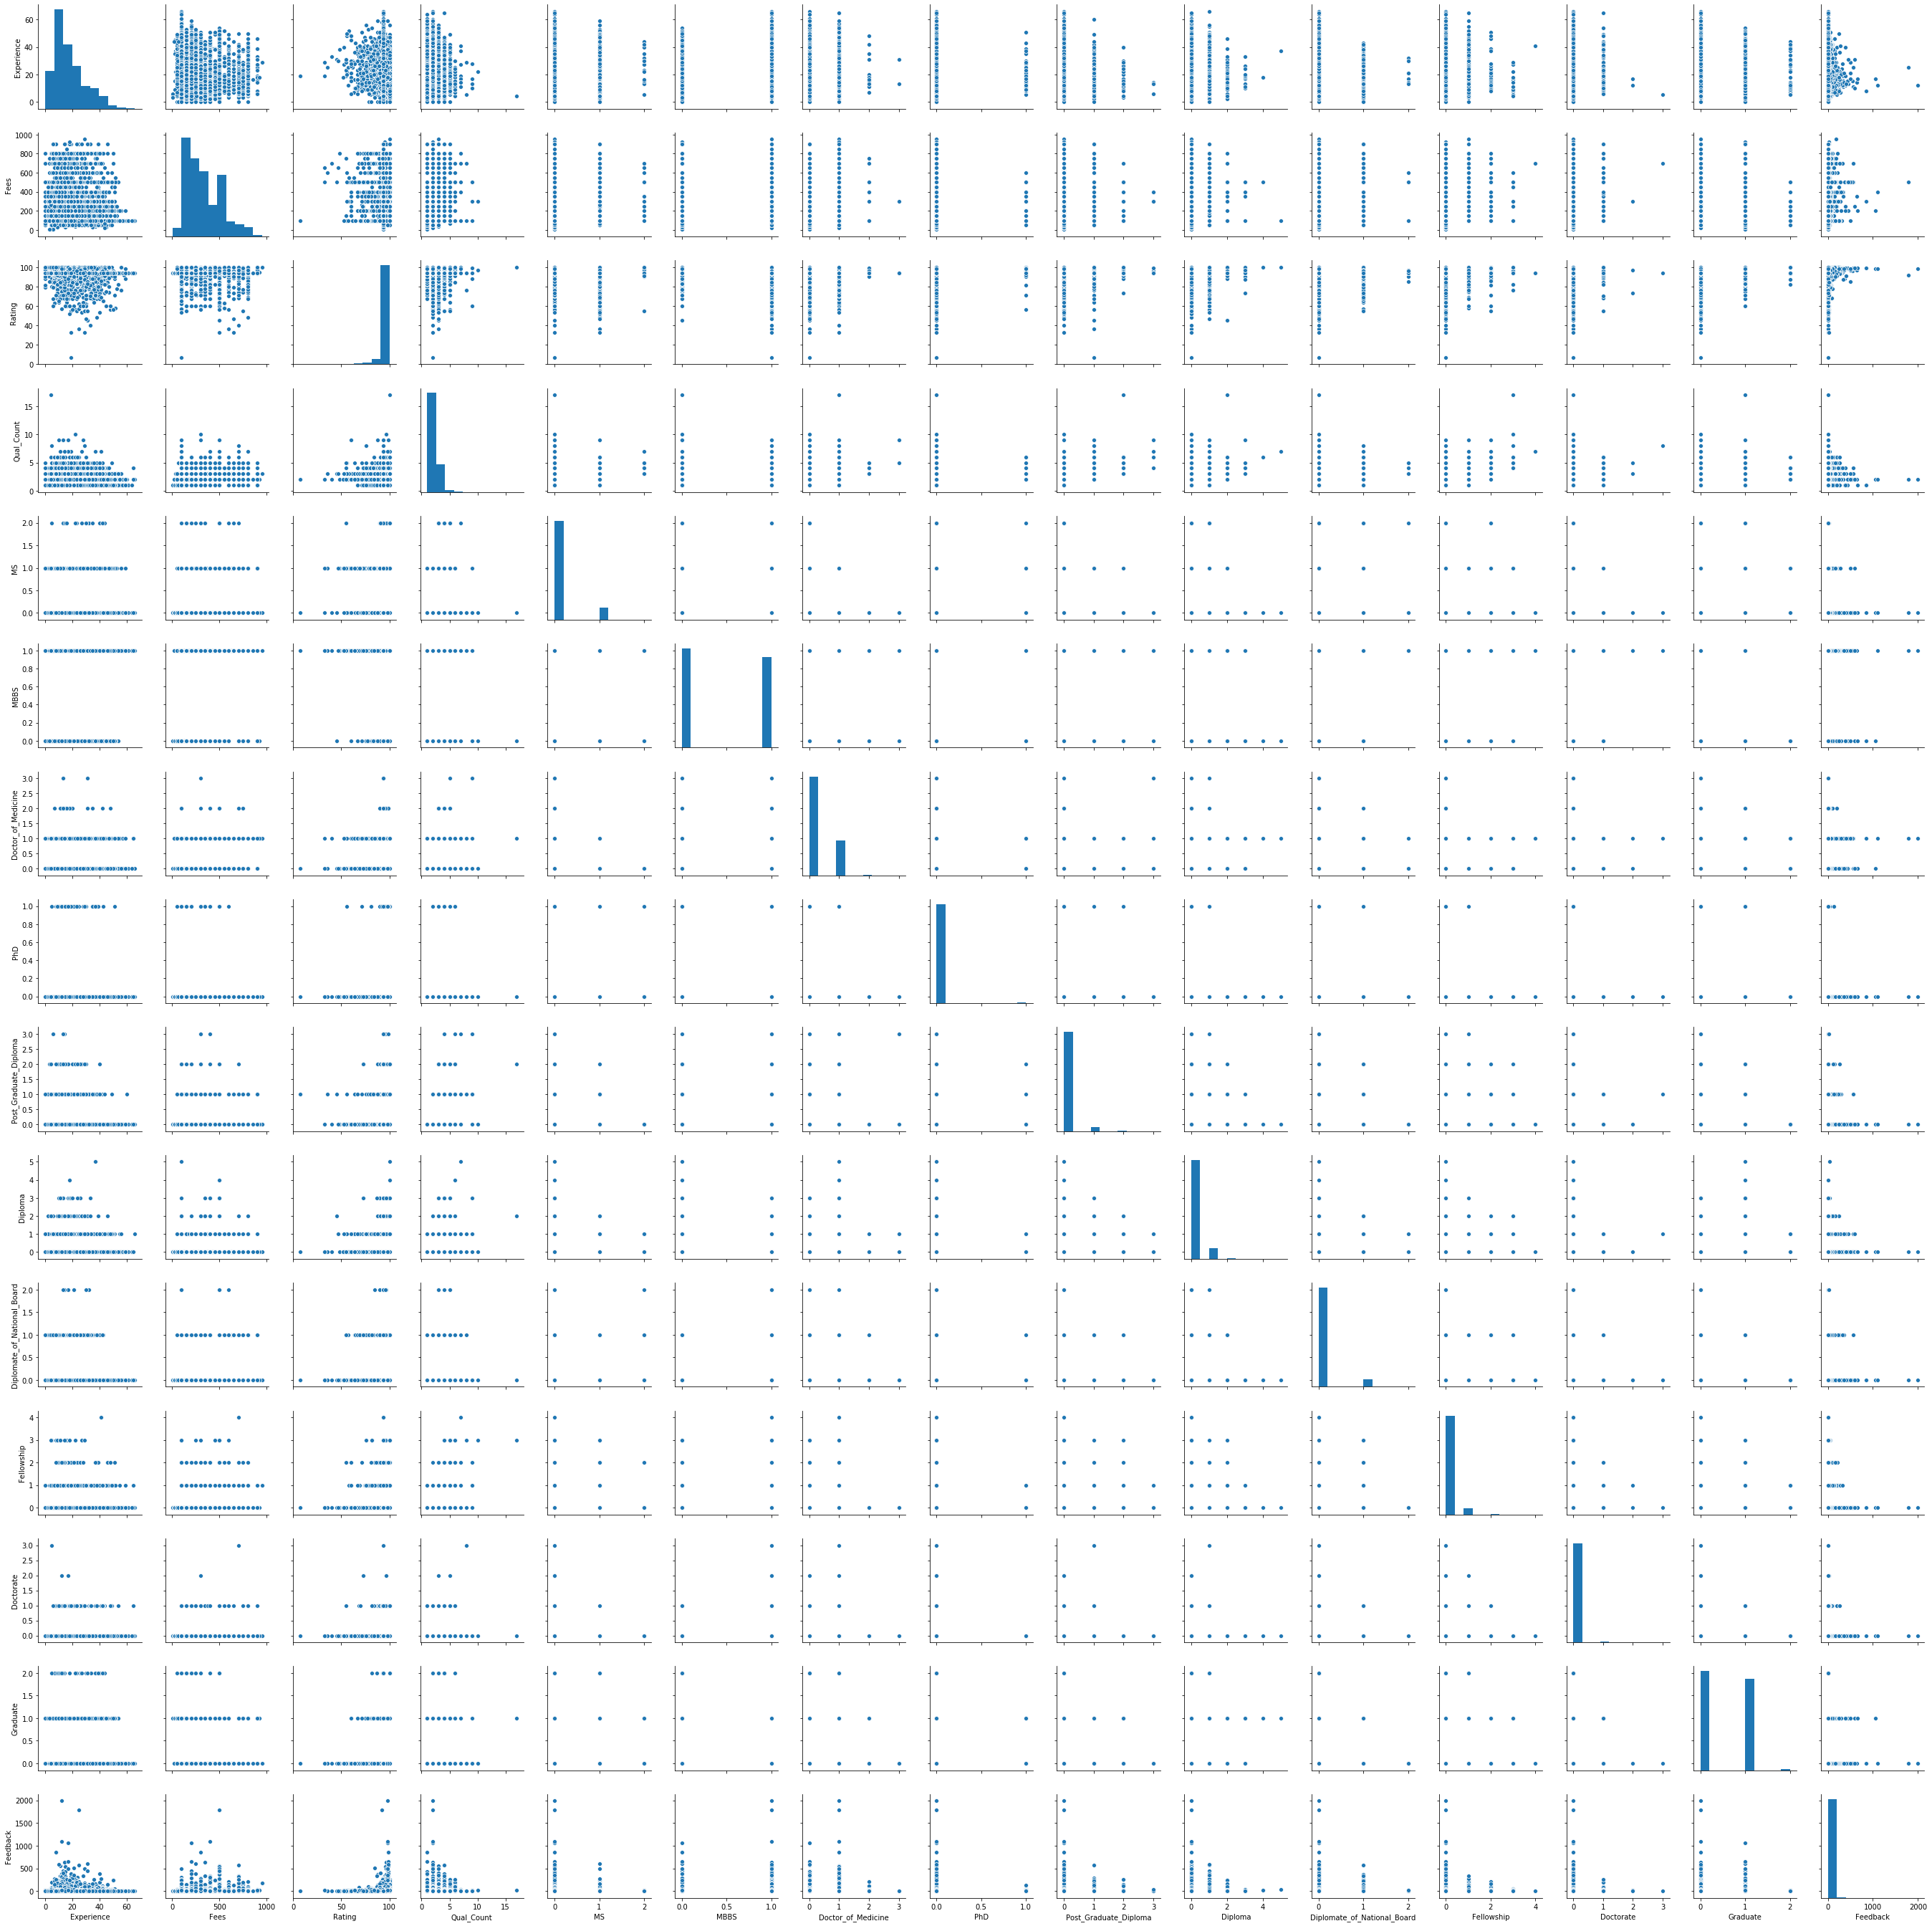

In [57]:
sns.pairplot(df)

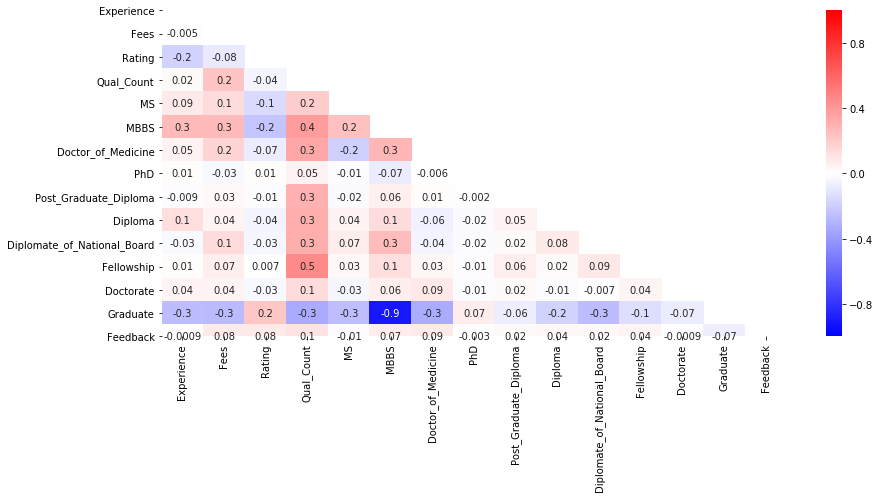

In [58]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, fmt='.1g', cmap='bwr', mask=np.triu(df.corr()))

Observations:
        1. Highly negatively correlation with MBBS and Graduate. Since MBBS is also a graduation and also the fact that MBBS and graduation is the highest number of data we have, it is a possible explaination.
        2. Qual_Count is also positively correlated with other features.

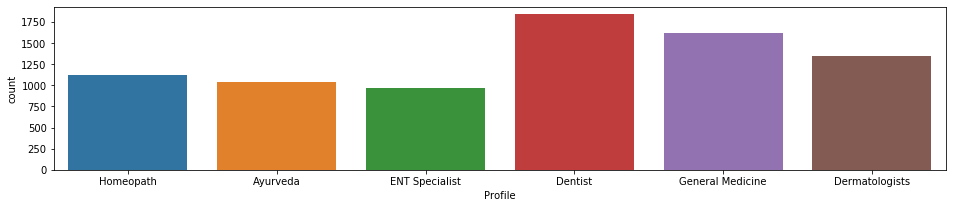

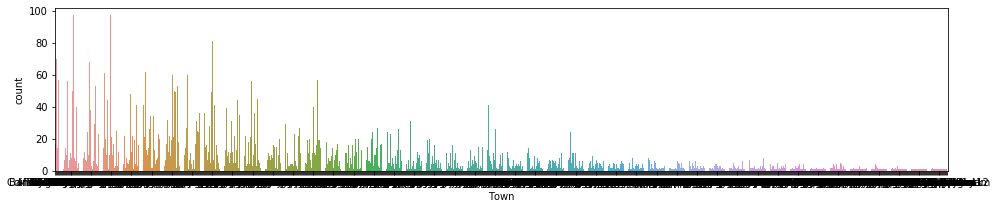

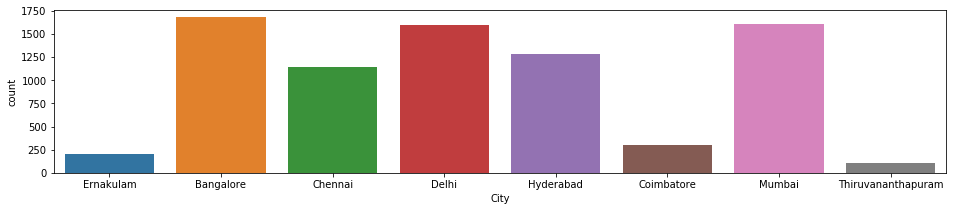

In [59]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

Observations:
    1. Town has lot of values and we are unable to see the right values in this graph.
    2. Approximately 1700 of the doctors are from Bangalore.
    3. More than 1700 doctors are dentists.

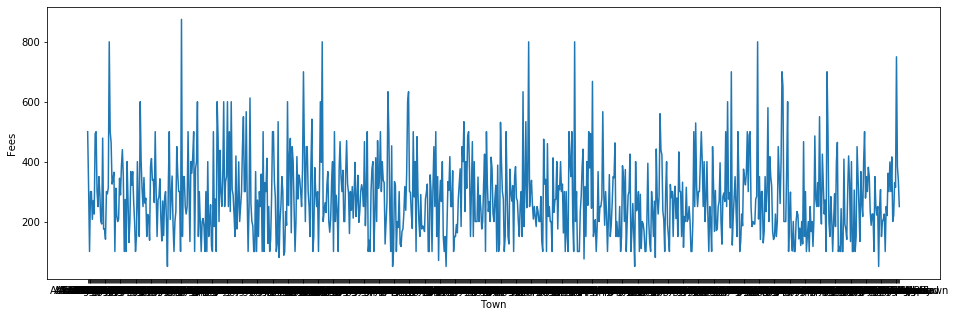

In [60]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Town', y='Fees', data=df, ci=None)

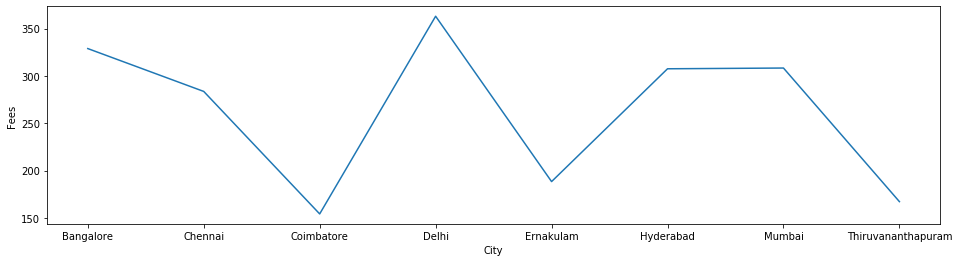

In [61]:
plt.figure(figsize=(16,4))
sns.lineplot(x='City', y='Fees', data=df, ci=None)

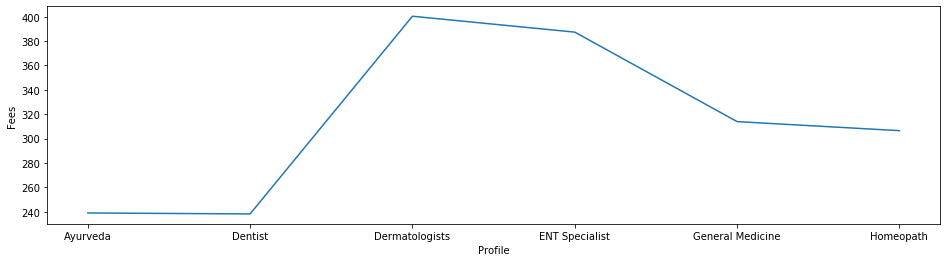

In [62]:
plt.figure(figsize=(16,4))
sns.lineplot(x='Profile', y='Fees', data=df, ci=None)

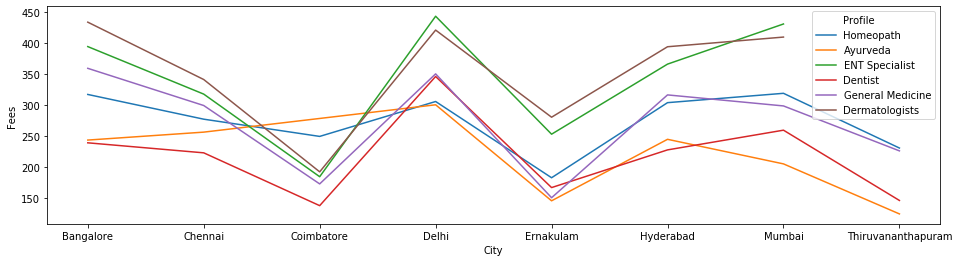

In [63]:
plt.figure(figsize=(16,4))
sns.lineplot(x='City', y='Fees', hue='Profile', data=df, ci=None)

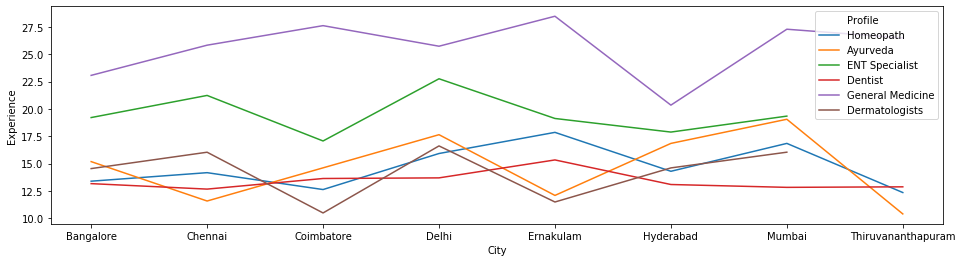

In [64]:
plt.figure(figsize=(16,4))
sns.lineplot(x='City', y='Experience', hue='Profile', data=df, ci=None)

Text(0, 0.5, '% of MBBS')

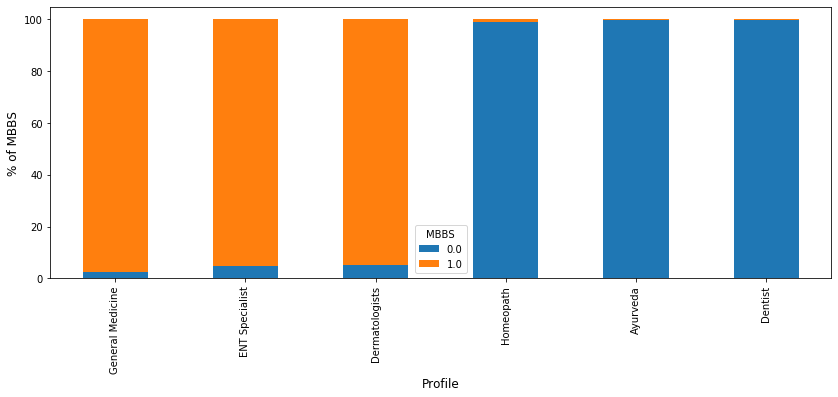

In [65]:
tbl=pd.crosstab(df['Profile'], df['MBBS'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Profile',fontsize=12)
plt.ylabel('% of MBBS',fontsize=12)

Text(0, 0.5, '% of Post_Graduate_Diploma')

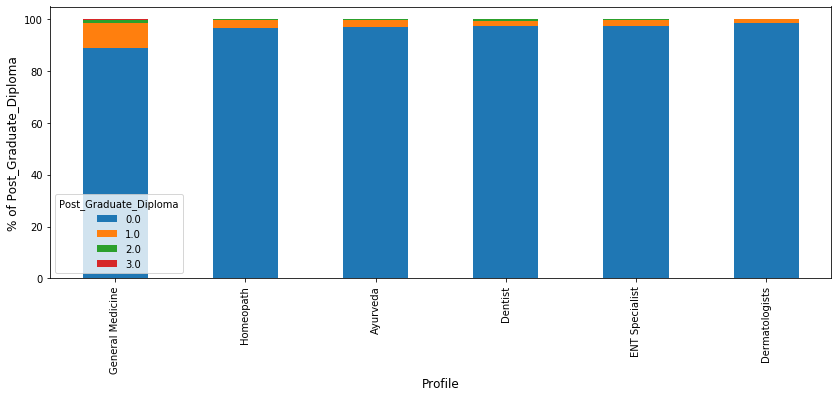

In [66]:
tbl=pd.crosstab(df['Profile'], df['Post_Graduate_Diploma'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('Profile',fontsize=12)
plt.ylabel('% of Post_Graduate_Diploma',fontsize=12)

Text(0, 0.5, '% of Diploma')

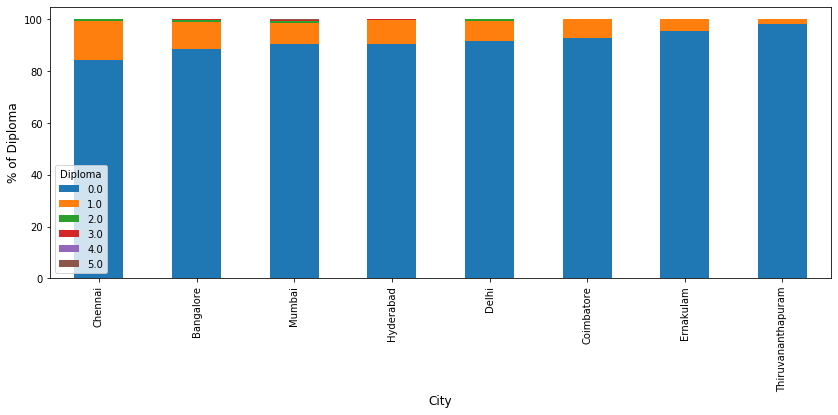

In [67]:
tbl=pd.crosstab(df['City'], df['Diploma'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by=0).plot(kind='bar',stacked=True,figsize=(14,5))
plt.xlabel('City',fontsize=12)
plt.ylabel('% of Diploma',fontsize=12)

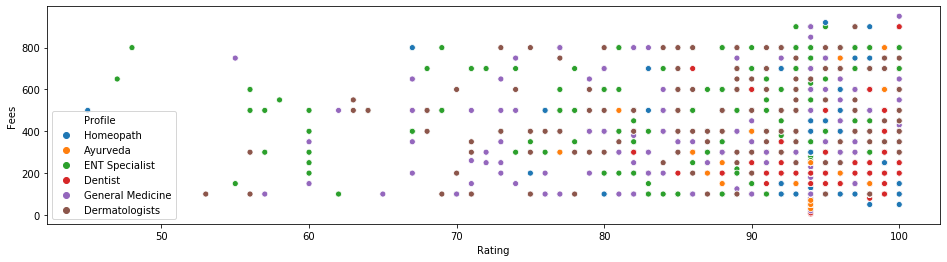

In [68]:
df1 = df[df['Rating'] > 40]
plt.figure(figsize=(16,4))
sns.scatterplot(x='Rating', y='Fees', hue='Profile', data=df1, ci=None)

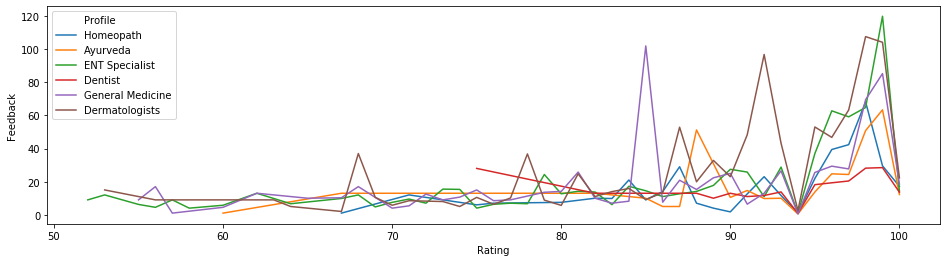

In [69]:
df1 = df[df['Rating'] > 50]
plt.figure(figsize=(16,4))
sns.lineplot(x='Rating', y='Feedback', hue='Profile', data=df1, ci=None)

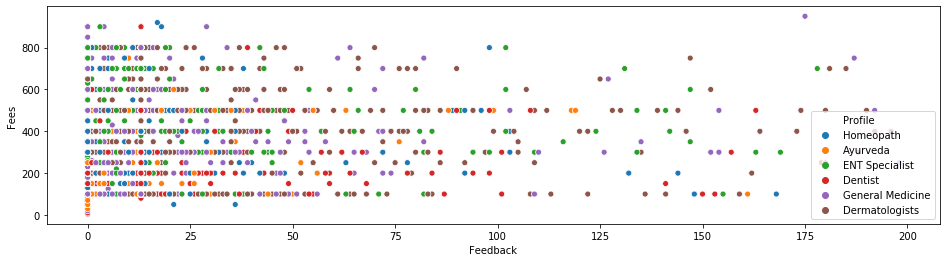

In [70]:
df1 = df[df['Feedback'] < 200]
plt.figure(figsize=(16,4))
sns.scatterplot(x='Feedback', y='Fees', hue='Profile', data=df1, ci=None)

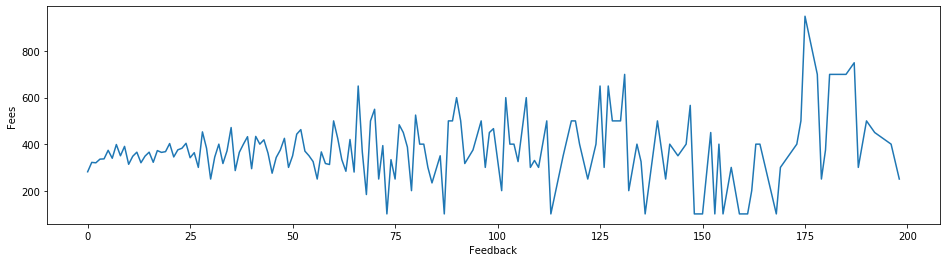

In [71]:
df1 = df[df['Feedback'] < 200]
plt.figure(figsize=(16,4))
sns.lineplot(x='Feedback', y='Fees', data=df1, ci=None)

In [72]:
df[df['City'].isna()]

,Experience,Fees,Profile,Rating,Qual_Count,MS,MBBS,Doctor_of_Medicine,PhD,Post_Graduate_Diploma,Diploma,Diplomate_of_National_Board,Fellowship,Doctorate,Graduate,Feedback,Town,City
3980,23,250.0,Dentist,94,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,e,NaN


In [73]:
df.drop(index=(df[df['City'].isna()].index), axis=0, inplace=True)

In [74]:
df=pd.get_dummies(df)
df.shape

(7915, 965)

In [75]:
df[df['Fees'].isna()].shape

(1981, 965)

In [76]:
df.shape[0]

7915

In [77]:
df.index = range(0,7915)
df[df['Fees'].isna()].head(2)

,Experience,Fees,Rating,Qual_Count,MS,MBBS,Doctor_of_Medicine,PhD,Post_Graduate_Diploma,Diploma,...,Town_Yeshwanthpur,Town_Yousufguda,City_Bangalore,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Hyderabad,City_Mumbai,City_Thiruvananthapuram
5934,35,NaN,94,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5935,31,NaN,94,2,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
df_train = df[0:5934]
df_test = df[5934:].drop(columns=['Fees'], axis=1)
x = df_train.drop(columns=['Fees'], axis=1)
y = df_train['Fees']

In [79]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [80]:
# Instanstiate PCA
pca=PCA(n_components=10)
x=pca.fit_transform(x)
x.shape

(5934, 10)

### Machine Learning Algorithms

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape -->',x_train.shape,'| x_test.shape -->',x_test.shape,'\ny_train.shape -->',y_train.shape,'| y_test.shape -->',y_test.shape)

x_train.shape --> (4747, 10) | x_test.shape --> (1187, 10) 
y_train.shape --> (4747,) | y_test.shape --> (1187,)


In [82]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test, score, rmse):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train, y_train)*100)
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('Accuracy Score :: %0.2f' %(model.score(x_train, y_train)*100))
    print('R2 Score:', r2_score(y_test, y_pred))
    print('>>> Error >>>')
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [83]:
# Instantiate all models
lreg = LinearRegression()
knr = KNeighborsRegressor()
rr = Ridge()
lr = Lasso()
enr = ElasticNet()
svr = SVR()
dct = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [84]:
all_models={'Linear Regression': lreg,
            'K-Neighbors Regressor': knr,
            'Ridge Regression': rr,
            'Lasso Regression': lr,
            'Elastic Net': enr,
            'Support Vector Regression': svr,
            'Decision Tree Regression': dct,
            'Random Forest Regressor': rf
           }

In [85]:
score,rmse = [],[]
for i, j in all_models.items():
    print('-------------------', i, '-------------------')
    models(j, x_train, x_test, y_train, y_test, score, rmse)

------------------- Linear Regression -------------------
Accuracy Score :: 16.82
R2 Score: 0.12692201160669025
>>> Error >>>
Mean Absolute Error: 138.50694449041274
Mean Squared Error: 30344.048535368758
Root Mean Squared Error: 174.19543201636705
------------------- K-Neighbors Regressor -------------------
Accuracy Score :: 41.19
R2 Score: 0.04784122968230187
>>> Error >>>
Mean Absolute Error: 140.26722830665545
Mean Squared Error: 33092.52131423757
Root Mean Squared Error: 181.91349953820793
------------------- Ridge Regression -------------------
Accuracy Score :: 16.82
R2 Score: 0.12692464165436534
>>> Error >>>
Mean Absolute Error: 138.50730772169965
Mean Squared Error: 30343.957127389902
Root Mean Squared Error: 174.19516964425247
------------------- Lasso Regression -------------------
Accuracy Score :: 16.81
R2 Score: 0.12738387964045006
>>> Error >>>
Mean Absolute Error: 138.60666011587577
Mean Squared Error: 30327.996193860145
Root Mean Squared Error: 174.1493502539132
----

In [86]:
pd.DataFrame([all_models.keys(), score, rmse], index=['Model', 'Accuracy Score', 'RMSE']).T.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score,RMSE
6,Decision Tree Regression,99.7834,233.783
7,Random Forest Regressor,88.2219,170.56
1,K-Neighbors Regressor,41.1856,181.913
0,Linear Regression,16.8247,174.195
2,Ridge Regression,16.8247,174.195
3,Lasso Regression,16.8129,174.149
4,Elastic Net,16.4497,174.01
5,Support Vector Regression,10.7288,179.65


In [87]:
cv_scores = cross_val_score(dct, x_train, y_train, cv=10)
cv_scores.mean()*100

-60.3912712710694

Conclusion:
    1. Support Vector regression is the worst model with 10.73% accuracy.
    2. We could not acheive a good score through cross validation.
    3. Ridge Regression and Lasso Regression did not improve the score from Linear Regression.
    4. As we can see, Decision Tree Regression gained 99.78% accuracy and is the best model for this dataset.

In [88]:
#Exporting model as pkl file
joblib.dump(dct,'dct_Doctor_Fees.pkl')

['dct_Doctor_Fees.pkl']

In [89]:
# predict the value
dct.fit(x_train, y_train)
pred=dct.predict(x_test)
print("Predicted Result Price:",pred)

Predicted Result Price: [200. 800. 700. ... 500. 300. 100.]


In [90]:
df_pred=pd.DataFrame(pred)
df_pred.to_csv('doctor_fees_prediction.csv')